### 학습목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류하는 실습을 해보자
- DecisionTree 분류 모델을 학습하고 시각화 & 과대적합 제어
- 모델 자체적으로 중요도가 높은 특성이 무엇인지 확인해보자

### Decision Tree(결정트리, 의사결정 나무)
- 스무고개 하듯이 True/False 질문을 반복하며 학습
- 특정 기준(질문, node)에 따라 데이터를 구분하는 모델
- 분류나 회귀 모두 사용 가능

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝 패키지 불러오기 --> sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 트리 분류 모델


### 1. 문제정의
- 버섯 데이터를 활용해서 독성/식용 버섯을 분류

### 2. 데이터 수집
- csv 파일

In [2]:
data = pd.read_csv('./data/mushroom.csv')
data

poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            p         x           s         n       t    p               f   
1            e         x           s         y       t    a               f   
2            e         b           s         w       t    l               f   
3            p         x           y         w       t    p               f   
4            e         x           s         g       f    n               f   
...        ...       ...         ...       ...     ...  ...             ...   
8119         e         k           s         n       f    n               a   
8120         e         x           s         n       f    n               a   
8121         e         f           s         n       f    n               a   
8122         p         k           y         n       f    y               f   
8123         e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [3]:
data.head(3)
# 답 데이터 -> poisonous
# p - 독버섯
# e - 식용버섯


poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  

[3 rows x 23 columns]

In [4]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 3~4. 데이터 전처리 및 탐색
- 문제(특성)와 답(라벨) 데이터 분리
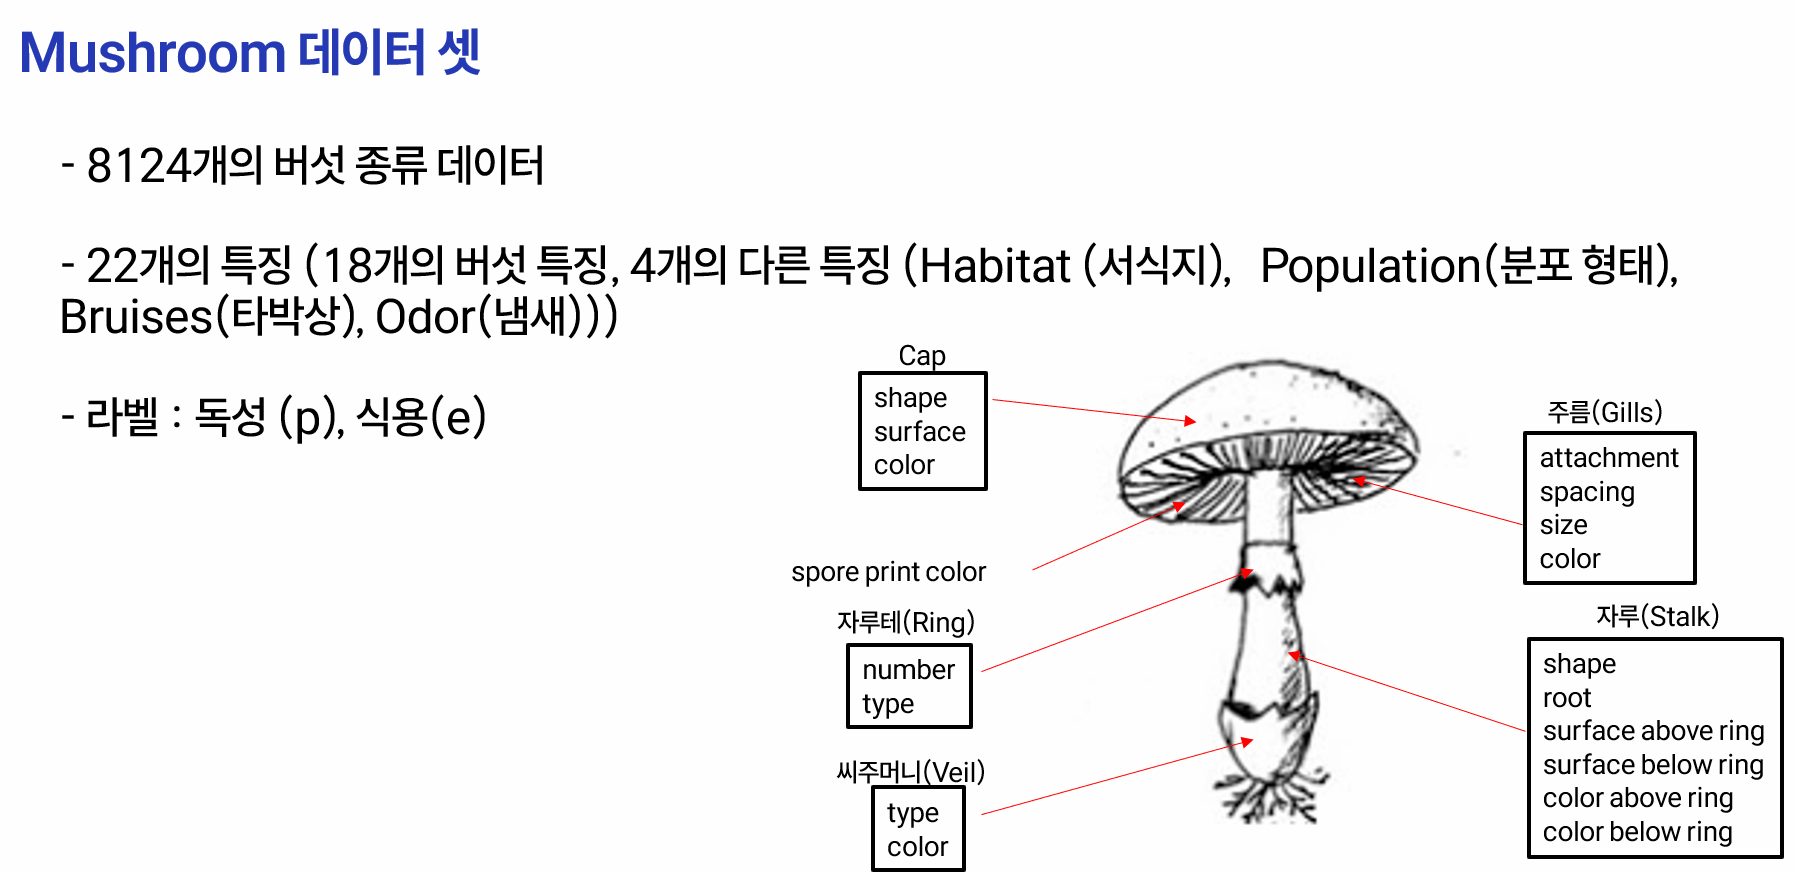
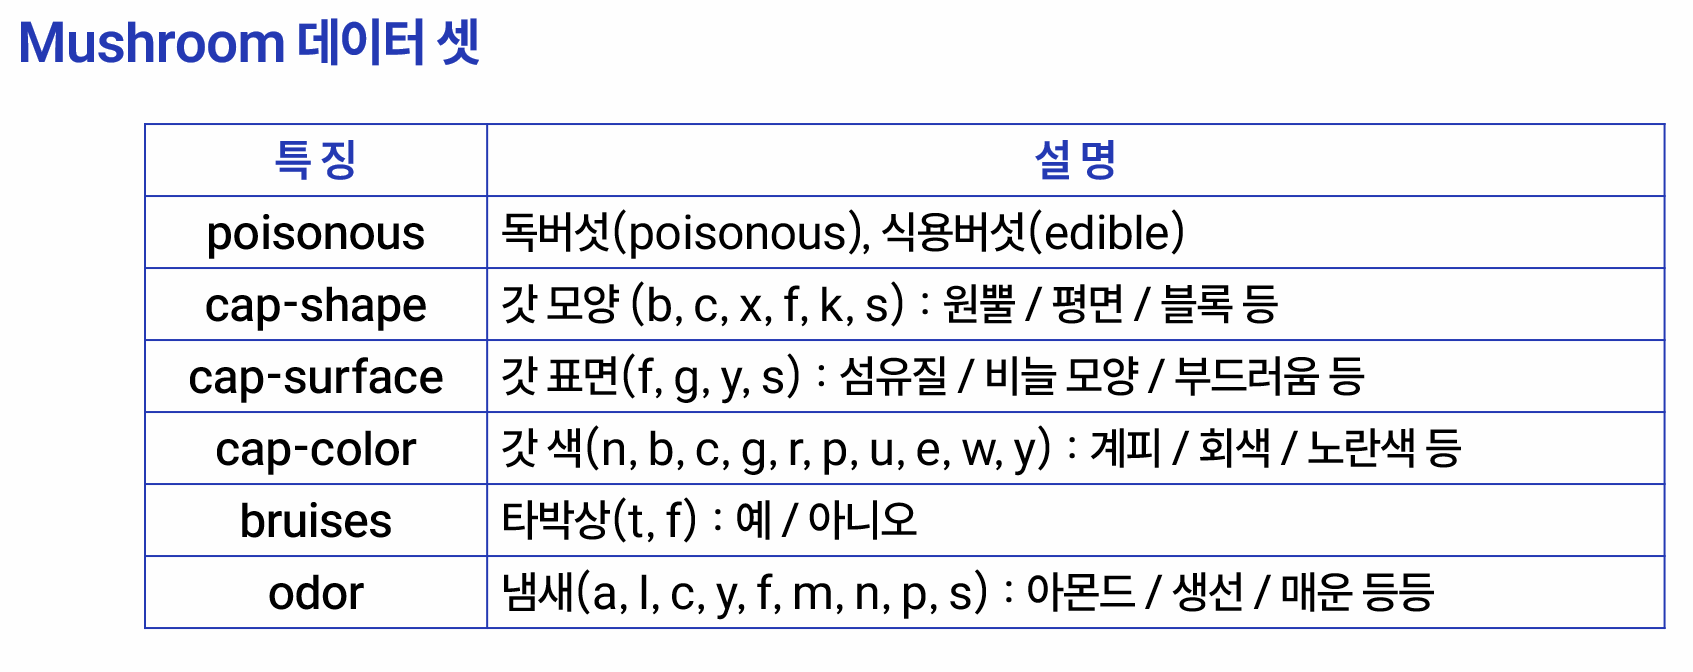
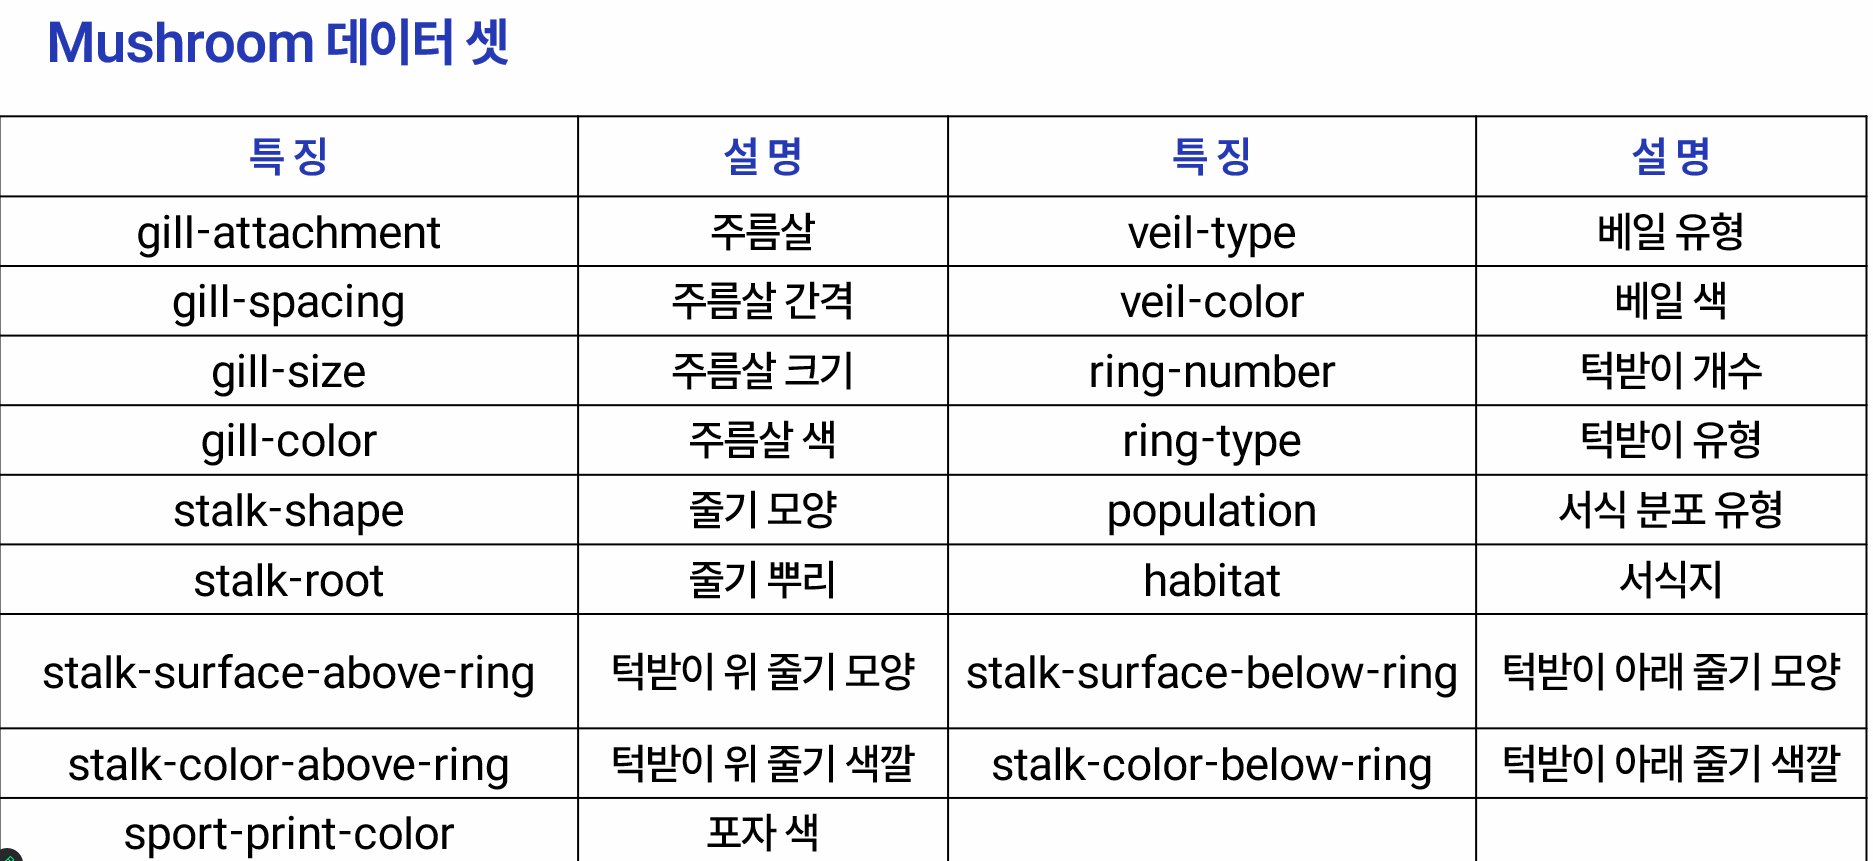

In [5]:
# 컬럼명 확인
data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
## 문제(X), 답(y) 데이터 분리해서 변수에 담기

# 컬럼 인덱싱
# 답 데이터는 poisonous 컬럼, 문제 데이터는 답데이터를 제외한 모든 컬럼
X = data.iloc[:, 1:] # 문제 데이터
y = data['poisonous'] # 답데이터

# 크기 확인
# shape
print('문제 크기 : ', X.shape)
print('답 크기 : ', y.shape)

문제 크기 :  (8124, 22)
답 크기 :  (8124,)


In [7]:
# 문제 데이터의 기술통계량 확인
# 최소값, 최댓값, 중앙값, 최빈값, 평균값...
X.describe()

cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq                       4936                   4464                   4384   

       veil-type veil-color ring-number ring-type spore-print-color  \
count       8124       8124        8124      8124              8124   
unique         1          4           3         5                 9   
top            p          w           o         p                 w   
freq        8124       7924        7488      3968              2388   

       population habitat  
count        8124    8124  
unique          6       7  
top             v       d  
freq         4040    3148  

[4 rows x 22 columns]

#### 인코딩(encoding) : 범주(문자) -> 수치
- 레이블 인코딩(label encoding) : 일일이 매핑, 값의 크고 작음의 의미가 o
- 원핫 인코딩(one-hot encoding) : 데이터의 종류 개수만큼 열을 늘려줌. 값의 크고 작음의 의미가 x

In [8]:
# 버섯데이터는 문자형 컬럼 -> 모든 컬럼을 원핫인코딩 통해 수치형 변환
# get_dummies(대상) : 원핫 인코딩

# X 모든 컬럼 원핫인코딩 적용
X_oh = pd.get_dummies(X) # True(1), False(0)
X_oh

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2            True        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False         True        False   
8120        False        False        False        False        False   
8121        False        False         True        False        False   
8122        False        False        False         True        False   
8123        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            True          False          False           True          False   
1            True          False          False           True          False   
2           False          False          False           True          False   
3            True          False          False          False           True   
4            True          False          False           True          False   
...           ...            ...            ...            ...            ...   
8119        False          False          False           True          False   
8120         True          False          False           True          False   
8121        False          False          False           True          False   
8122        False          False          False          False           True   
8123         True          False          False           True          False   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...          True         False         False      False      False   
1     ...         False         False         False      False       True   
2     ...         False         False         False      False      False   
3     ...          True         False         False      False      False   
4     ...         False         False         False      False       True   
...   ...           ...           ...           ...        ...        ...   
8119  ...         False         False         False      False      False   
8120  ...         False          True         False      False      False   
8121  ...         False         False         False      False      False   
8122  ...         False          True         False      False      False   
8123  ...         False         False         False      False      False   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0         False      False      False       True      False  
1         False      False      False      False      False  
2         False       True      False      False      False  
3         False      False      False       True      False  
4         False      False      False      False      False  
...         ...        ...        ...        ...        ...  
8119       True      False      False      False      False  
8120       True      False      False      False      False  
8121       True      False      False      False      False  
8122       True      False      False      False      False  
8123       True      False      False      False      False  

[8124 rows x 117 columns]

In [9]:
# 크기 확인
print(X_oh.shape)
print(X.shape)

(8124, 117)
(8124, 22)


In [10]:
# 훈련세트와 테스트 세트로 분리 --> 문제(X_oh), 답(y)
# 훈련세트 : 테스트세트 = 7:3
# train_test_split(문제, 답, 테스트셋의 비율, 랜덤고정값 5)

X_train, X_test, y_train, y_test = train_test_split(X_oh, y,
                                                   test_size=0.3,
                                                   random_state=5)


In [11]:
# 크기확인
print('훈련 문제 : ', X_train.shape)
print('훈련 답: ', y_train.shape)
print('테스트 문제 : ', X_test.shape)
print('테스트 답: ', y_test.shape)

훈련 문제 :  (5686, 117)
훈련 답:  (5686,)
테스트 문제 :  (2438, 117)
테스트 답:  (2438,)


### 5. 모델링
- tree 모델 객체 생성
- 학습

In [12]:
# 모델 생성
tree_model = DecisionTreeClassifier() # 하이퍼파라미터 조정x 기본값 그대로 생성
tree_model

DecisionTreeClassifier()

#### 모델의 일반화 성능 확인 : 교차 검증(cross-validation)
- 개념 : 일반화 성능 측정 방법 -> 모든 데이터에 대해 모델이 얼마나 잘 맞추는지 내부적으로 평가, 한번의 train 으로 test 하는 것보다 더 안정적인 평가 방법
- 방법 : 훈련세트를 기준으로 훈련세트, 검증용 세트로 여러겹 나눠서 평가 (새로운 test 데이터를 여러개 만들어서 평가)
- 모델을 정의하고 학습하기 전에 정확도가 어느 정도인지 확인 가능
- 장점 : 1)과대적합/과소적합 방지 2) test 하기 전 정확도를 미리 알 수 있음

In [13]:
# 학습
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
# 교차검증 도구
from sklearn.model_selection import cross_val_score 

In [15]:
# cross_val_score(모델명, 훈련문제, 훈련답, cv=검증횟수(검증 데이터 몇개로 나눌지))
result1 = cross_val_score(tree_model, X_train, y_train, cv=5)
result1

# 해당 모델은 버섯 분류에 있어서 과대적합을 제어하지 않아도
# 성능이 상당히 좋은 상태


array([1.        , 0.99912049, 1.        , 1.        , 1.        ])

In [16]:
# X_test 성능 확인
# accuracy_score() : 정확도 평가도구
# 간혹 모델 자체적으로 정확도 평가 함수를 가지고 있는 경우 존재

# 모델이 자체적으로 가지고 있는 평가 함수 score() 사용 -> 정확도(accuracy)
tree_model.score(X_test, y_test) # 100% 정확도
# ==> 버섯 특징 데이터는 버섯을 잘 분류하기에 좋은 데이터였음


1.0

#### 모델이 선택한 중요한 특성 확인
- 특성 선택
- tree 계열의 모델은 특성 중요도를 출력하는 키워드가 있음
- 모델.feature_importances_

In [17]:
fi = tree_model.feature_importances_  # 특성 중요도
fi # 과학적표기법(지수 표기법) --> 실수값

array([0.        , 0.00070414, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00140651, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01279543, 0.02975405, 0.        , 0.        ,
       0.0229749 , 0.        , 0.60894119, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0063993 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18401748, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09810763, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
# df로 변환 
fi_df = pd.DataFrame(fi, index = X_oh.columns, columns=['import'])
fi_df

import
cap-shape_b  0.000000
cap-shape_c  0.000704
cap-shape_f  0.000000
cap-shape_k  0.000000
cap-shape_s  0.000000
...               ...
habitat_l    0.000000
habitat_m    0.000000
habitat_p    0.000000
habitat_u    0.000000
habitat_w    0.000000

[117 rows x 1 columns]

In [19]:
# 특성 중요도 내림차순 정렬해보기(top5)
fi_df['import'].sort_values(ascending=False).head()

# 중요도가 가장 높은 컬럼 odor_n --> 거의 60% 차지

odor_n                        0.608941
stalk-root_c                  0.184017
stalk-surface-below-ring_y    0.098108
spore-print-color_r           0.034899
odor_a                        0.029754
Name: import, dtype: float64

### tree 모델 시각화

In [20]:
# !pip install graphviz

In [21]:
from sklearn.tree import export_graphviz

In [22]:
# 결정 트리 모델 시각화하여 저장(내보내기)
export_graphviz(tree_model, out_file = './data/tree.dot',
               class_names = ['독','식'],
               feature_names = X_oh.columns,
               impurity = False, # 지니 불순도와 유사한 개념
               filled = True) # 해당 노드의 클래스에 대한 색상 지정

In [23]:
import graphviz

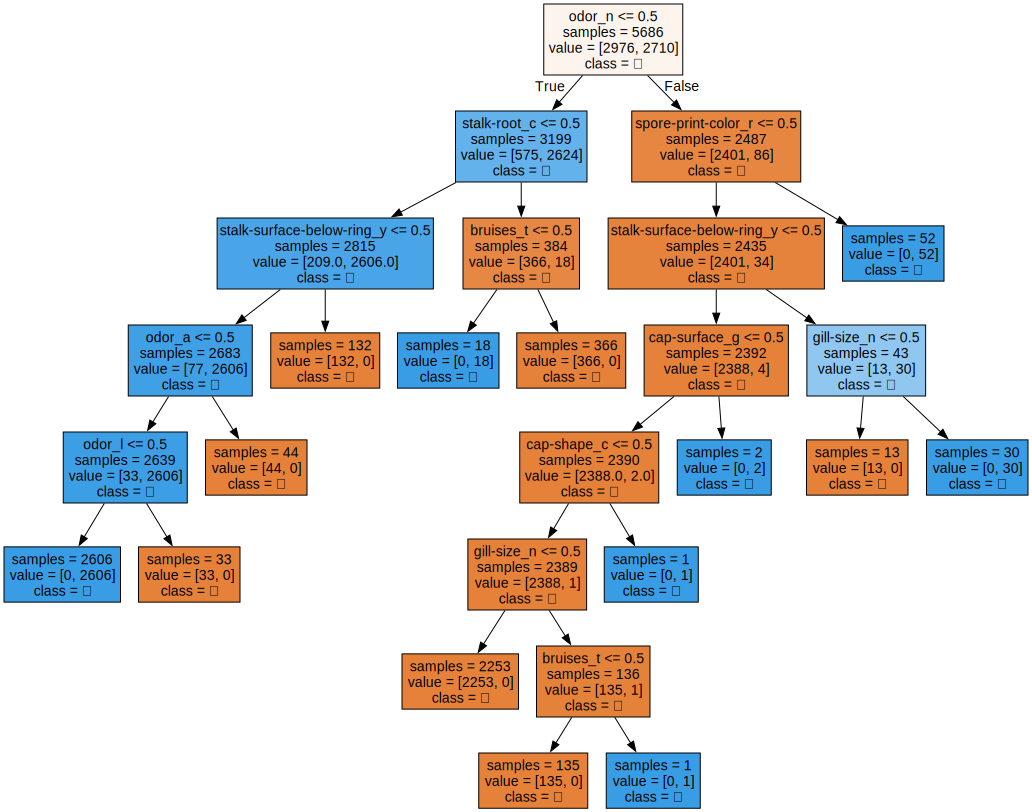

In [24]:
# tree.dot 파일 열어야함
with open('./data/tree.dot', encoding='UTF8') as f:
    # 읽어진 상태
    dot_graph = f.read()
dot_graph

# 그래프 그리기
display(graphviz.Source(dot_graph))

In [27]:
# 하이퍼 파라미터 조정 
# tree 모델 객체 생성 --> 최대 깊이(max_depth) 3
tree_model2 = DecisionTreeClassifier(max_depth = 3)
tree_model2

# 학습
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

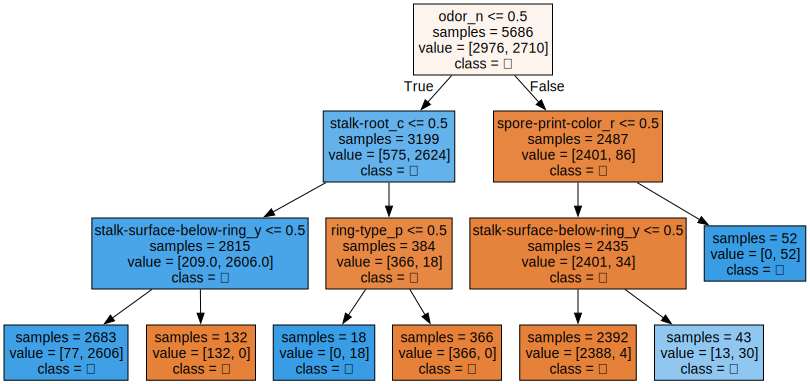

In [28]:
# 결정 트리 모델 시각화하여 저장(내보내기)
export_graphviz(tree_model2, out_file = './data/tree2.dot',
               class_names = ['독','식'],
               feature_names = X_oh.columns,
               impurity = False, # 지니 불순도와 유사한 개념
               filled = True) # 해당 노드의 클래스에 대한 색상 지정

# tree.dot 파일 열어야함
with open('./data/tree2.dot', encoding='UTF8') as f:
    # 읽어진 상태
    dot_graph = f.read()
dot_graph

# 그래프 그리기
display(graphviz.Source(dot_graph))